In [1]:
import clustering_functions as cf

2023-04-13 11:00:49.829563: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 11:00:49.927658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 11:00:49.928748: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 11:00:51.056194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
csv_path = "etl_data/contratistas_df.csv"
result_df = cf.read_partitioned_csv(csv_path)
result_df.head()

,NIT_ENTIDAD,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,...,0,0,0,1,0,0,NaN,NaN,NaN,NaN
1,899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,39.645161
2,8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,...,1,0,0,1,5,0,NaN,NaN,NaN,NaN
3,830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,...,3,9,0,3,0,0,NaN,NaN,NaN,NaN
4,900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN


In [3]:
cleaned_df = cf.replace_nulls(result_df)
cleaned_df.head()

,NIT_ENTIDAD,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
0,805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
1,899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,3.964516e+01
2,8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
3,830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
4,900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [4]:
cleaned_df.index = cleaned_df['NIT_ENTIDAD']
cleaned_df = cleaned_df.drop(columns=['NIT_ENTIDAD'])
cleaned_df.head()

,NOMBRE_ENTIDAD,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON,21,143107415,6.814639e+06,1,2,2,4,1,1,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
899999034,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...,143,4797008008,3.354551e+07,1,4,3,3,1,1,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,3.964516e+01
8605110716,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,178,25267081930,1.419499e+08,1,7,6,9,1,1,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
830063506,BOGOTA - TRANSMILENIO,1171,181157002383,1.547028e+08,1,7,7,12,1,1,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
900816913,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...,1,223000000,2.230000e+08,1,1,0,1,1,1,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [5]:
cleaned_df_nombre_entidad = cleaned_df[['NOMBRE_ENTIDAD']]
cleaned_df_nombre_entidad.head()

cleaned_df.drop(columns=['NOMBRE_ENTIDAD'], inplace=True)
cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,21,143107415,6.814639e+06,1,2,2,4,1,1,19,...,0,0,0,1,0,0,0.0,0.0,0.0,1.000000e+08
899999034,143,4797008008,3.354551e+07,1,4,3,3,1,1,18,...,0,0,0,0,0,0,10.0,26631119.0,2663111.9,3.964516e+01
8605110716,178,25267081930,1.419499e+08,1,7,6,9,1,1,19,...,1,0,0,1,5,0,0.0,0.0,0.0,1.000000e+08
830063506,1171,181157002383,1.547028e+08,1,7,7,12,1,1,18,...,3,9,0,3,0,0,0.0,0.0,0.0,1.000000e+08
900816913,1,223000000,2.230000e+08,1,1,0,1,1,1,18,...,0,0,0,0,1,0,0.0,0.0,0.0,1.000000e+08


In [7]:
scaled_df = cf.apply_standard_scaler(cleaned_df)
scaled_df.index = cleaned_df_nombre_entidad.index
scaled_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,INTERVENTORIA,CONCESION,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,-0.364315,-0.148728,-0.084107,-0.042361,-0.761068,-0.438972,-0.045020,-0.05858,-0.05858,-0.034309,...,-0.120693,-0.047528,-0.061336,-0.046374,-0.038630,-0.061254,-0.301189,-0.098713,-0.115375,0.531693
899999034,-0.195536,-0.131249,-0.075690,-0.042361,0.455254,0.074463,-0.411444,-0.05858,-0.05858,-0.657006,...,-0.120693,-0.047528,-0.061336,-0.137110,-0.038630,-0.061254,1.059938,-0.068842,-0.098587,-1.880787
8605110716,-0.147116,-0.054368,-0.041555,-0.042361,2.279737,1.614767,1.787102,-0.05858,-0.05858,-0.034309,...,0.205632,-0.047528,-0.061336,-0.046374,-0.016398,-0.061254,-0.301189,-0.098713,-0.115375,0.531693
830063506,1.226637,0.531116,-0.037539,-0.042361,2.279737,2.128202,2.886375,-0.05858,-0.05858,-0.657006,...,0.858281,30.653583,-0.061336,0.135098,-0.038630,-0.061254,-0.301189,-0.098713,-0.115375,0.531693
900816913,-0.391984,-0.148428,-0.016033,-0.042361,-1.369229,-1.465842,-1.144293,-0.05858,-0.05858,-0.657006,...,-0.120693,-0.047528,-0.061336,-0.137110,-0.034184,-0.061254,-0.301189,-0.098713,-0.115375,0.531693


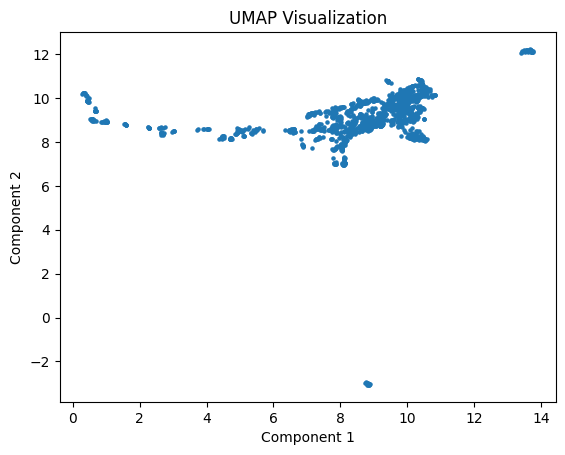

UMAP components:
 [[ 7.8053613   8.567711    9.352015   ...  1.1675684   8.518041
   9.024325  ]
 [10.307861    9.869747    9.788638   ...  0.84344137  7.8564205
   7.1568265 ]
 [ 8.713293    9.771018    9.9654     ...  0.6485861   8.046944
   8.933768  ]
 ...
 [ 9.901708    8.95579     9.110957   ...  1.7275999   9.119813
   9.681271  ]
 [10.047104    9.098472    9.169004   ...  1.7170633   9.032158
   8.046632  ]
 [ 8.806401   -3.0404012  10.621547   ...  2.7987225   9.903426
   6.6240964 ]]

Cumulative explained variance:
 [0.40039122 0.5653033  0.6056711  0.7559157  0.8290727  0.85876876
 0.8973584  1.        ]


In [8]:
n_components = 8
umap_data, explained_variance_ratio_cumsum = cf.apply_umap(scaled_df, n_components)

print("UMAP components:\n", umap_data)
print("\nCumulative explained variance:\n", explained_variance_ratio_cumsum)


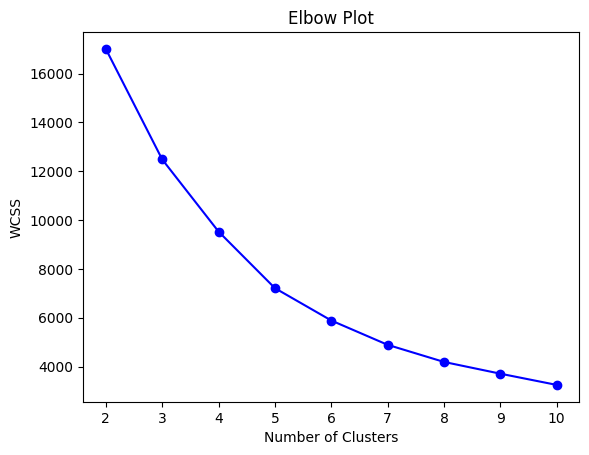

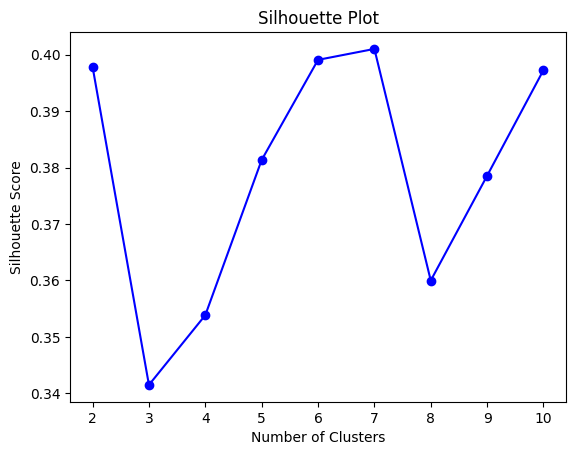

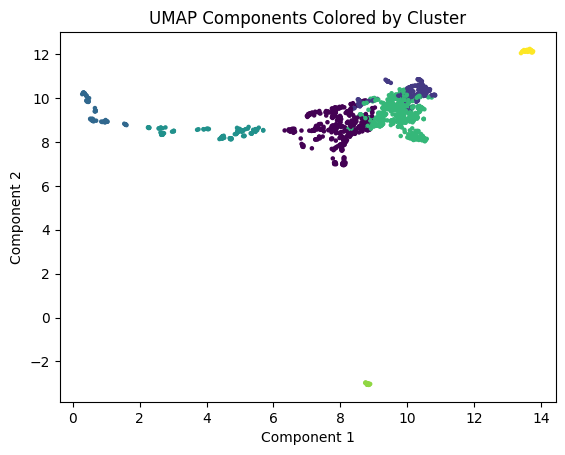

Optimal number of clusters: 7
Cluster labels: [0 1 4 ... 4 4 5]


In [9]:
optimal_clusters, labels = cf.find_optimal_clusters(umap_data)

print("Optimal number of clusters:", optimal_clusters)
print("Cluster labels:", labels)


In [10]:
cleaned_df['cluster'] = labels
cleaned_df['NOMBRE_ENTIDAD'] = cleaned_df_nombre_entidad
cleaned_df.head()

,num_contratos,suma_valor_total_contrato,promedio_valor_total_contrato,num_departamentos,num_estados_proceso,num_clases_proceso,num_tipos_proceso,num_familias,num_clases,meses_desde_ultimo_contrato,...,ASOCIACION PUBLICO PRIVADA,OBRA,DECREELAW0922017,VENTA MUEBLES,numero_de_multas,suma_valor_sancion,promedio_valor_sancion,meses_desde_ultima_multa,cluster,NOMBRE_ENTIDAD
NIT_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
805027641,21,143107415,6.814639e+06,1,2,2,4,1,1,19,...,0,1,0,0,0.0,0.0,0.0,1.000000e+08,0,INSTITUCION EDUCATIVA RAFAEL NAVIA VARON
899999034,143,4797008008,3.354551e+07,1,4,3,3,1,1,18,...,0,0,0,0,10.0,26631119.0,2663111.9,3.964516e+01,1,SENA REGIONAL CALDAS CENTRO PARA LA FORMACION ...
8605110716,178,25267081930,1.419499e+08,1,7,6,9,1,1,19,...,0,1,5,0,0.0,0.0,0.0,1.000000e+08,4,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...
830063506,1171,181157002383,1.547028e+08,1,7,7,12,1,1,18,...,0,3,0,0,0.0,0.0,0.0,1.000000e+08,4,BOGOTA - TRANSMILENIO
900816913,1,223000000,2.230000e+08,1,1,0,1,1,1,18,...,0,0,1,0,0.0,0.0,0.0,1.000000e+08,0,ESTABLECIMIENTO PUBLICO AMBIENTAL DEL DISTRITO...


In [14]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

cluster_centroids = cf.get_cluster_centroids(cleaned_df)
print(cluster_centroids)

         num_contratos  suma_valor_total_contrato  promedio_valor_total_contrato  num_departamentos  num_estados_proceso  num_clases_proceso  num_tipos_proceso  num_familias  num_clases  meses_desde_ultimo_contrato  SANTANDER    VAUPES     NARIÑO   CAQUETA  NO DEFINIDO   CASANARE       META  AMAZONAS  GUAVIARE     CAUCA   VICHADA  ANTIOQUIA    QUINDIO     CHOCO  SAN ANDRES PROVIDENCIA Y SANTA CATALINA     CALDAS     BOYACA  VALLE DEL CAUCA  CUNDINAMARCA  LA GUAJIRA     TOLIMA    ARAUCA  NORTE DE SANTANDER      BOGOTA      HUILA     SUCRE  ATLANTICO    BOLIVAR  RISARALDA  PUTUMAYO  MAGDALENA   GUAINIA   CORDOBA     CESAR  TERMINADO     ACTIVO  BORRADOR     CEDIDO  MODIFICADO  EN EJECUCION  ENVIADO PROVEEDOR  SUSPENDIDO   CERRADO  CONTRATACION DIRECTA      null  CONCURSO DE MERITOS  CONTRATACION MINIMA CUANTIA  LICITACION OBRA PUBLICA   SUBASTA  LICITACION PUBLICA  REGIMEN ESPECIAL  SELECCION ABREVIADA DE MENOR CUANTIA  EMPRESTITO   SEGUROS  CONSULTORIA  PRESTACION DE SERVICIOS  ACUERDO 

- Cluster 0 - "Pequeñas entidades locales con bajas multas y sanciones":
    - Este cluster se caracteriza por entidades que tienen un número relativamente bajo de contratos (62), con un valor total de contrato moderado (4.57x10^9).
Tienen pocas multas (5.49x10^5) y sanciones con un promedio moderado de valor de sanción (9.83x10^7).
Hace 18.72 meses desde el último contrato y 9.83 meses desde la última multa.
Predominantemente ubicadas en Santander y Cundinamarca.


- Cluster 1 - "Entidades grandes con multas y sanciones moderadas":
    - Este cluster se compone de entidades con un alto número de contratos (347), con un valor total de contrato alto (2.23x10^10).
Tienen multas y sanciones moderadas (4.08x10^8) con un promedio de valor de sanción bajo (9.24x10^6).
Hace 18.94 meses desde el último contrato y 5.22 meses desde la última multa.
Predominantemente ubicadas en Antioquia, Valle del Cauca y Bogotá.


- Cluster 2 - "Entidades pequeñas con contratos de alto valor y pocas sanciones":
    - Este cluster se compone de entidades con un número muy bajo de contratos (4), pero con un valor total de contrato moderado (4.32x10^8).
No tienen multas ni sanciones.
Hace 24.31 meses desde el último contrato.
Distribución geográfica diversa, sin una ubicación predominante.


- Cluster 3 - "Entidades pequeñas con contratos de valor moderado y sin sanciones":
    - Este cluster se compone de entidades con un número muy bajo de contratos (6), con un valor total de contrato bajo (4.41x10^8).
No tienen multas ni sanciones.
Hace 20.55 meses desde el último contrato.
Distribución geográfica diversa, sin una ubicación predominante.


- Cluster 4 - "Entidades grandes con altas multas y sanciones":
    - Este cluster se compone de entidades con un alto número de contratos (513), con un valor total de contrato muy alto (8.73x10^10).
Tienen altas multas y sanciones (1.02x10^10) con un promedio de valor de sanción moderado (5.30x10^8).
Hace 18.41 meses desde el último contrato y 1.19 meses desde la última multa.
Predominantemente ubicadas en Bogotá, Cundinamarca y Antioquia.

In [16]:
# sigue indice de transparencia del cluster, segun rfm contratos y multas, castiga por estar en el cluster
# sigue a nivel contrato, si el contrato es anomalo dentro del cluster mas puntos de castigo
# final indice de transparencia y dashboard (no se si hacer modelo predictivo para palancas, creo que n)